# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [86]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

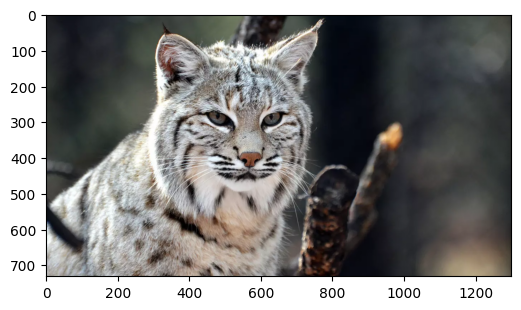

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr=cv2.imread("/content/Image_used_for_assignment1.jpg")
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()

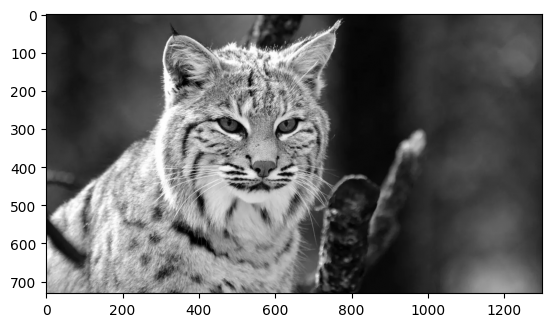

In [88]:
B,G,R=img_bgr[:,:,0], img_bgr[:,:,1], img_bgr[:,:,2]
gray_np=0.299*R+0.587*G+0.114*B
gray_np=gray_np.astype(np.uint8)
plt.imshow(gray_np, cmap='gray')
plt.show()

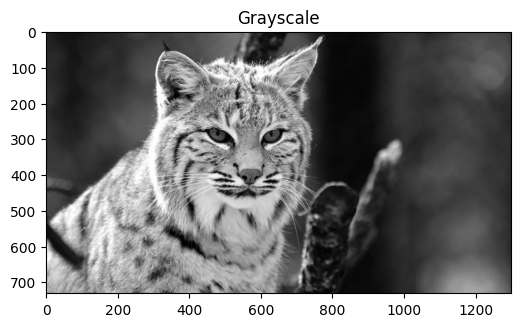

In [89]:
gray_cv2=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_cv2,cmap='gray')
plt.title("Grayscale")
plt.show()

In [90]:
print("\nPixel Value Comparison (Top-Left):")
print(f"NumPy Grayscale Pixel [0, 0]: {gray_np[0, 0]}")
print(f"cv2 Grayscale Pixel [0, 0]: {gray_cv2[0, 0]}")


Pixel Value Comparison (Top-Left):
NumPy Grayscale Pixel [0, 0]: 36
cv2 Grayscale Pixel [0, 0]: 36


In [91]:
print("\nArray Shapes:")
print(f"RGB Image Shape: {img_rgb.shape}")
print(f"NumPy Grayscale Image Shape: {gray_np.shape}")
print(f"cv2 Grayscale Image Shape: {gray_cv2.shape}")


Array Shapes:
RGB Image Shape: (731, 1300, 3)
NumPy Grayscale Image Shape: (731, 1300)
cv2 Grayscale Image Shape: (731, 1300)


In [92]:
print("\nSample Pixel Values (at [10, 10]):")
print(f"RGB Pixel: {img_rgb[10, 10]}") # (R, G, B) values
print(f"NumPy Grayscale Pixel: {gray_np[10, 10]}") # Single intensity value


Sample Pixel Values (at [10, 10]):
RGB Pixel: [31 33 37]
NumPy Grayscale Pixel: 32


I didnt noticed any difference in the array size of the RGB and the Grayscale

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [93]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [94]:
#B1convert image to FFT of the grayscale image
image_float = gray_np.astype(np.float32)
f=np.fft.fft2(image_float)
fshift=np.fft.fftshift(f)

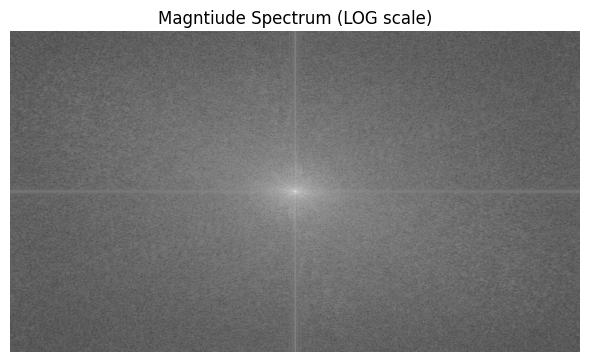

In [95]:
#B2
mag=np.abs(fshift) #magnitude
magnitude=20*np.log(np.abs(fshift)+1) #magnitude spectrum
phase_spectrum=np.angle(fshift) #phase spectrum
# plt.figure(figsize=(6,6))
# plt.imshow(gray_np, cmap='gray')
# plt.title('Original Grayscale Image')
# plt.axis('off')

plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap='gray')
plt.title('Magntiude Spectrum (LOG scale)')
plt.axis('off')
plt.tight_layout()
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [96]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

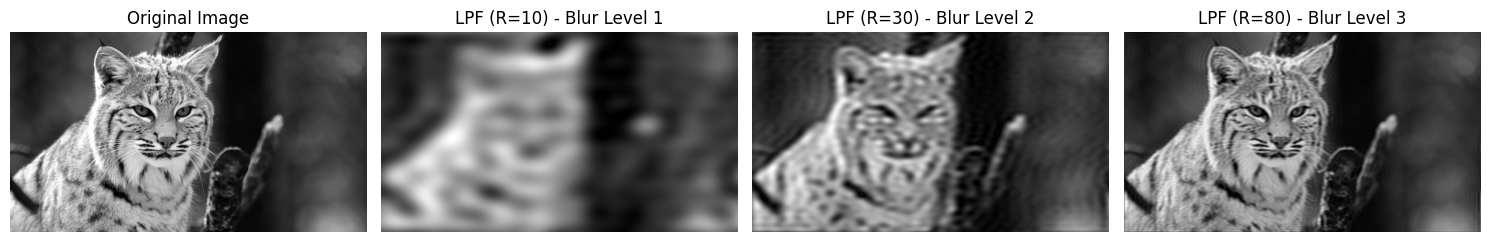

In [97]:
#C1
rows, cols = gray_np.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates
radi=[10,30,80]

plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i,r in enumerate(radi):
  #mask
  mask=np.zeros((rows,cols),np.uint8)
  cv2.circle(mask,(ccol,crow),r,1,-1)
  f_lpf=fshift*mask
  #inverse fft for low pass fliter
  ishift_lpf=np.fft.ifftshift(f_lpf)
  img_back_lpf=np.fft.ifft2(ishift_lpf)
  img_back_lpf=np.abs(img_back_lpf)
  #display
  plt.subplot(1,4,i+2)
  plt.imshow(img_back_lpf,cmap='gray')
  plt.title(f'LPF (R={r}) - Blur Level {i+1}')
  plt.axis('off')

plt.tight_layout()
plt.show()


Clearly we can see that as the radius increases the blur level decreases.

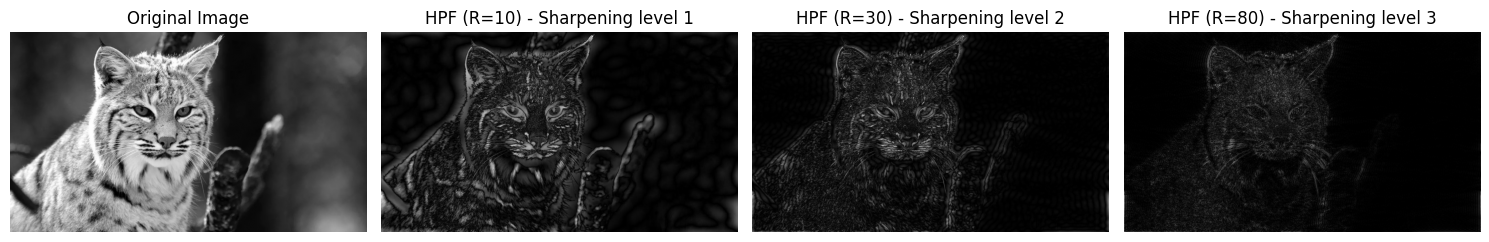

In [98]:
#C2
rows, cols = gray_np.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates
radi=[10,30,80]

plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i,r in enumerate(radi):
  #mask
  mask=np.zeros((rows,cols),np.uint8)
  cv2.circle(mask,(ccol,crow),r,1,-1)
  mask_hpf=1-mask #conversion of lpf to hpf
  f_hpf=fshift*mask_hpf
  #inverse fft for high pass filter
  ishift_hpf=np.fft.ifftshift(f_hpf)
  img_back_hpf=np.fft.ifft2(ishift_hpf)
  img_back_hpf=np.abs(img_back_hpf)
  #display
  plt.subplot(1,4,i+2)
  plt.imshow(img_back_hpf,cmap='gray')
  plt.title(f'HPF (R={r}) - Sharpening level {i+1}')
  plt.axis('off')

plt.tight_layout()
plt.show()

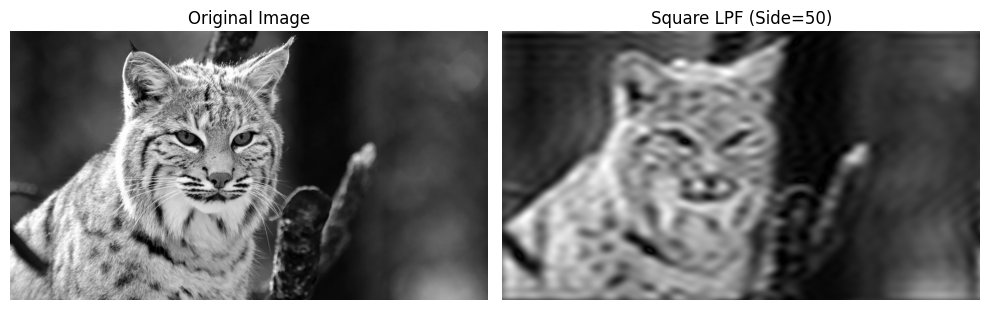

In [99]:
#C3
side=50
half_side=side//2
#dimensions
mask_sq = np.zeros((rows, cols), dtype=np.uint8)
row_start = crow - half_side
row_end = crow + half_side
col_start = ccol - half_side
col_end = ccol + half_side
mask_sq[row_start:row_end, col_start:col_end] = 1
fshift_sq_lpf = fshift * mask_sq
#inverse fft for low pass
ishift_sq_lpf=np.fft.ifftshift(fshift_sq_lpf)
img_sq_lpf=np.fft.ifft2(ishift_sq_lpf)
img_sq_lpf=np.abs(img_sq_lpf)
#display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sq_lpf, cmap='gray')
plt.title(f'Square LPF (Side={side})')
plt.axis('off')

plt.tight_layout()
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [100]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

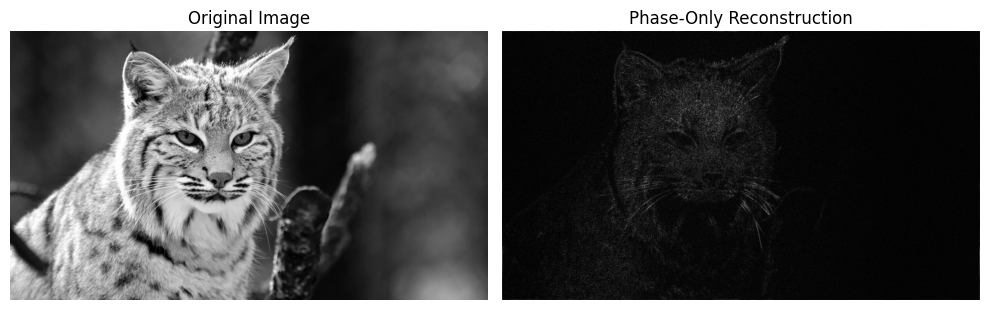

In [101]:
#D1
phase_only=fshift/np.abs(fshift)
ph_ishift=np.fft.ifftshift(phase_only)
img_ph=np.fft.ifft2(ph_ishift)
img_phase_only=np.abs(img_ph)

#display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_phase_only, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')
plt.tight_layout()
plt.show()

# DIFFERENCE EXPLANATION:
# 1. 'phase_only = fshift / np.abs(fshift)' returns a COMPLEX unit vector (e^(i*theta)).
#    It preserves the complex nature (Real + Imaginary parts) required for the
#    Inverse FFT function to work correctly. It sets Magnitude to 1 but keeps the direction.
# 2. 'np.angle(fshift)' returns a SCALAR (float) value.
#    It gives just the angle theta in radians (between -pi and pi).
#    It is not a complex number, so it cannot be used directly as a frequency spectrum.

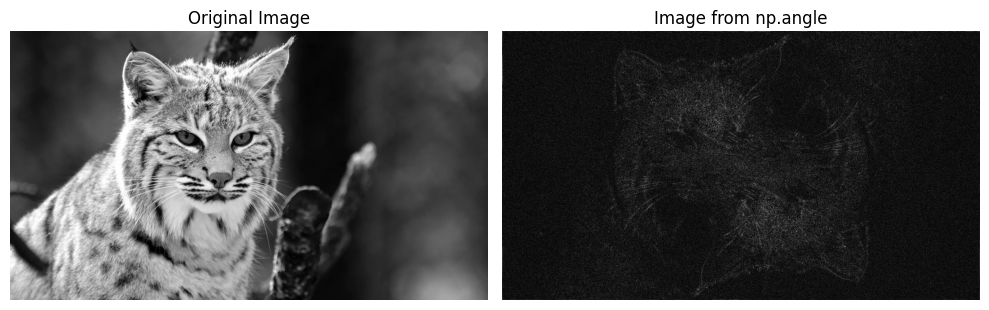

In [102]:
#with np.angle
phase_spect=np.angle(fshift)
ishift_ang=np.fft.ifftshift(phase_spect)
img_from_ang=np.fft.ifft2(ishift_ang)
img_from_ang=np.abs(img_from_ang)

#display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_from_ang, cmap='gray')
plt.title('Image from np.angle')
plt.axis('off')
plt.tight_layout()
plt.show()

# EXPLANATION OF OUTPUT:
# The output looks like noise with faint outlines. This is because i passes raw angle values(scalars) into the inverse FFT.
# The function misinterpreted these angles as Magnitudes, resulting in a mathematically incorrect and visually distorted image.
# 'np.angle' returns real numbers (scalar values like 1.57, 3.14).

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

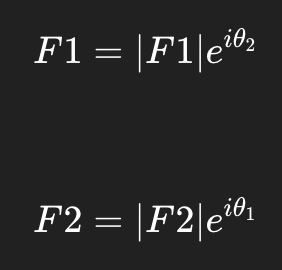

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [103]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

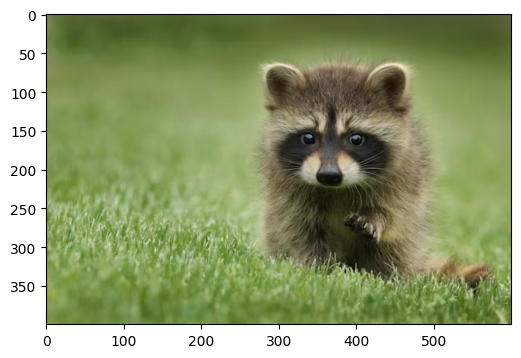

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img2_bgr=cv2.imread("/content/2nd_image_for_assignment_1.avif")
img2_rgb=cv2.cvtColor(img2_bgr,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img2_rgb)
plt.show()

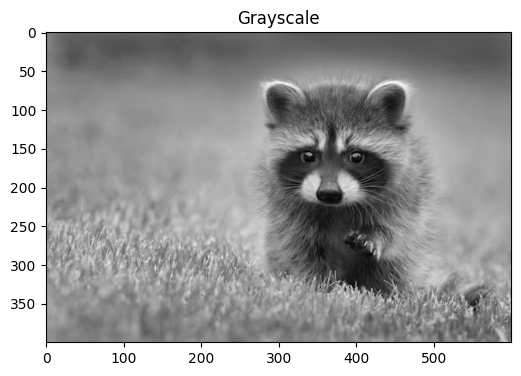

In [105]:
gray_img2=cv2.cvtColor(img2_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_img2,cmap='gray')
plt.title("Grayscale")
plt.show()

In [106]:
rows, cols = gray_np.shape
gray_np2 = cv2.resize(gray_img2, (cols, rows))
#image 1
image_float1 = gray_np.astype(np.float32)
f1=np.fft.fft2(image_float1)
fshift1=np.fft.fftshift(f1)
mag1=np.abs(fshift1) #magnitude of the 1st image
phase1=np.angle(fshift1) #phase spectrum of 1st image
#image 2
image_float2 = gray_np2.astype(np.float32)
f2=np.fft.fft2(image_float2)
fshift2=np.fft.fftshift(f2)
mag2=np.abs(fshift2) #magnitude of the 2nd image
phase2=np.angle(fshift2) #phase spectrum of 2nd image



In [107]:
# Combine magnitude of image 1 with phase of image 2
# F_A = |F1| * e^(j * phase2)
complex_a = mag1 * np.exp(1j * phase2)

# Combine magnitude of 2 with phase of 1
# F_B = |F2| * e^(j * phase1)
complex_b = mag2 * np.exp(1j * phase1)

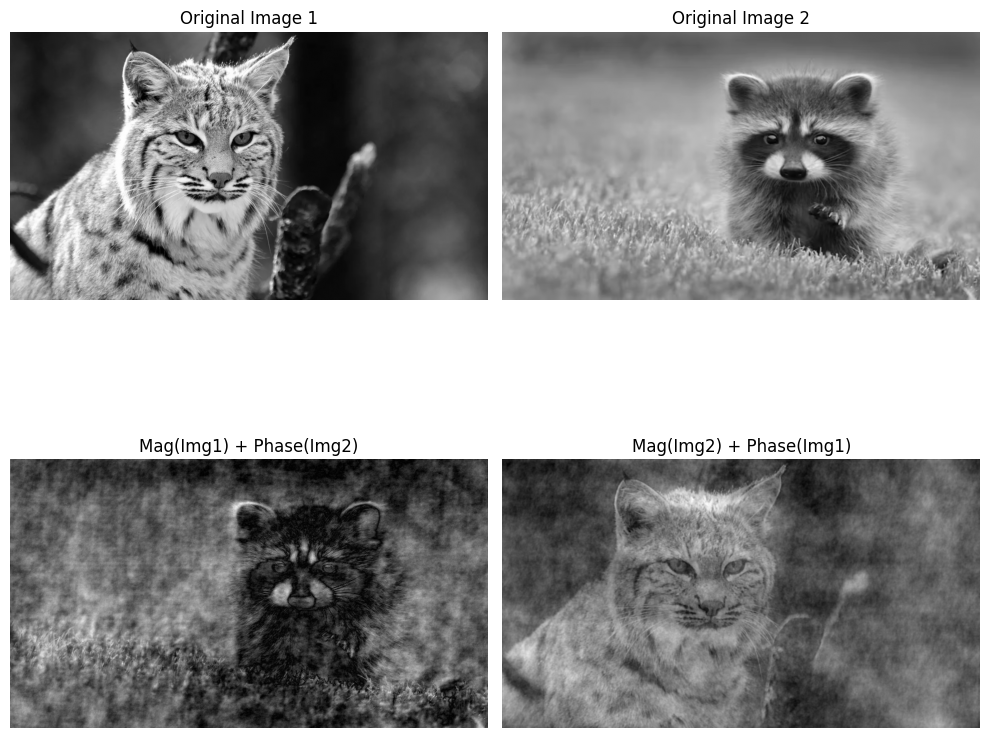

In [108]:
#Reconstruction
#complex_a
ishift1=np.fft.ifftshift(complex_a)
img_swap1=np.fft.ifft2(ishift1)
img_swap1=np.abs(img_swap1)

#complex_b
ishift2=np.fft.ifftshift(complex_b)
img_swap2=np.fft.ifft2(ishift2)
img_swap2=np.abs(img_swap2)

#display
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_np2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_swap1, cmap='gray')
plt.title("Mag(Img1) + Phase(Img2)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_swap2, cmap='gray')
plt.title("Mag(Img2) + Phase(Img1)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Yes, i saw the difference
# when i combined the magnitude of the bobcat (Img1) with the phase of the racoon (Img2)->the result looked like racoon
# when i combined the phase of the bobcat(Img1) with the magnitude of the racoon(Img2)-> the result looked like bobcat
# This tells that:
# 1. PHASE carries the "Structure" (geometry, edges, and shapes) of the image.
#    That is why the output took the form of the image that provided the phase.
# 2. MAGNITUDE carries the "Texture" (contrast, brightness, and smooth/rough patterns).
#    That is why the Raccoon looked slightly "cloudy" or had the lighting characteristics of the Bobcat.